<a href="https://colab.research.google.com/github/bradencruzzz/lego-company-history-data-analysis/blob/main/lego_history_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [ ]:
colors_df = pd.read_csv('data/colors.csv')

In [ ]:
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [ ]:
colors_df['rgb'].nunique()

124

In [ ]:
colors_df['is_trans'].value_counts()

,count
is_trans,
f,107
t,28


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [ ]:
opaque_count = colors_df[colors_df['is_trans'] == 'f'].shape[0]
transparent_count = colors_df[colors_df['is_trans'] == 't'].shape[0]

print(f"Number of opaque colors: {opaque_count}")
print(f"Number of transparent colors: {transparent_count}")

Number of opaque colors: 107
Number of transparent colors: 28


In [ ]:
opaque_count_sum = (colors_df['is_trans'] == 'f').sum()
transparent_count_sum = (colors_df['is_trans'] == 't').sum()

print(f"Number of opaque colors (using sum()): {opaque_count_sum}")
print(f"Number of transparent colors (using sum()): {transparent_count_sum}")

Number of opaque colors (using sum()): 107
Number of transparent colors (using sum()): 28


**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

<img src="https://www.google.com/url?q=https%3A%2F%2Fi.imgur.com%2FaKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png

<img src="https://www.google.com/url?q=https%3A%2F%2Fi.imgur.com%2FwhB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.

In [ ]:
sets_df = pd.read_csv('data/sets.csv')

In [ ]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [ ]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [ ]:
sets_df.sort_values('year',ascending=True).head()

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [ ]:
sets_df[sets_df['year'] == 1949].shape[0]

5

**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [ ]:
sets_df.sort_values('num_parts',ascending=False).head(10)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922
11471,75978-1,Diagon Alley,2020,246,5547
15612,SWMP-1,Star Wars / M&M Mosaic - Promo Set,2005,158,5462
1689,2000409-1,Window Exploration Bag,2010,507,5200
212,10179-1,Millennium Falcon - UCS,2007,171,5195
9805,70620-1,NINJAGO City,2017,616,4873


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [ ]:
sets_df.groupby('year').count()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [ ]:
sets_df[sets_df['year'] == 2019].shape[0] - sets_df[sets_df['year'] == 1955].shape[0]

812

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

In [ ]:
year_over_year = sets_df.groupby('year').size().iloc[:-2]
print(year_over_year)

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2015    774
2016    757
2017    786
2018    816
2019    840
Length: 69, dtype: int64


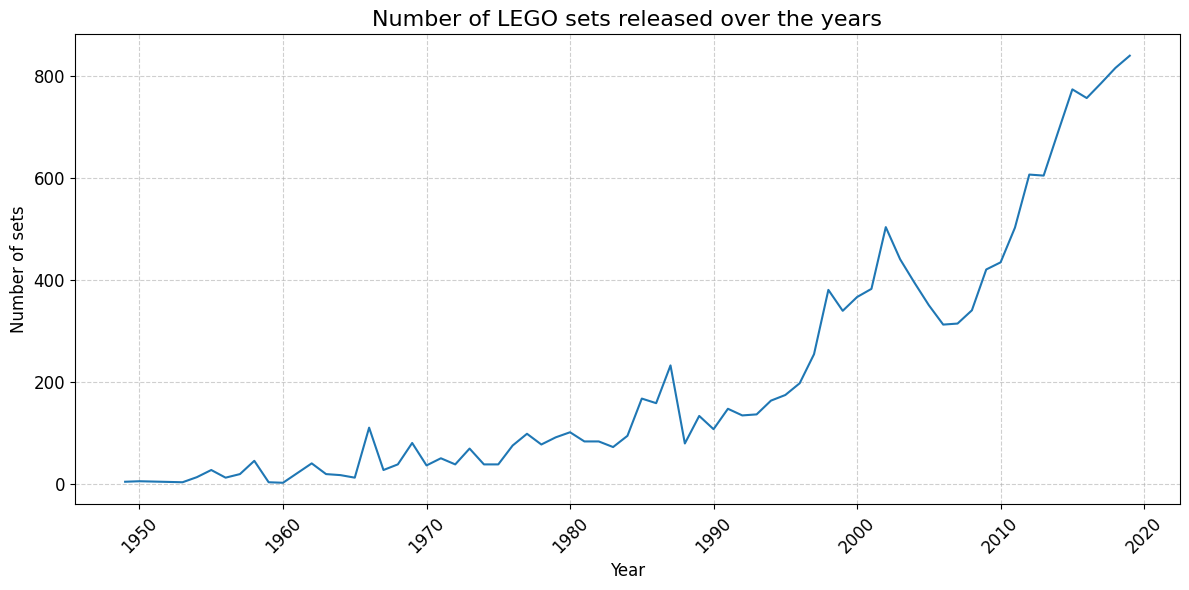

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(year_over_year.index, year_over_year.values)

plt.title('Number of LEGO sets released over the years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of sets', fontsize=12)

# Format x-axis to show full year numbers
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.style.use('default')
plt.show()

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [ ]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})

In [ ]:
themes_by_year.rename(columns = {'theme_id': 'nr_themes'}, inplace=True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [ ]:
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

Text(0, 0.5, 'Number of themes')

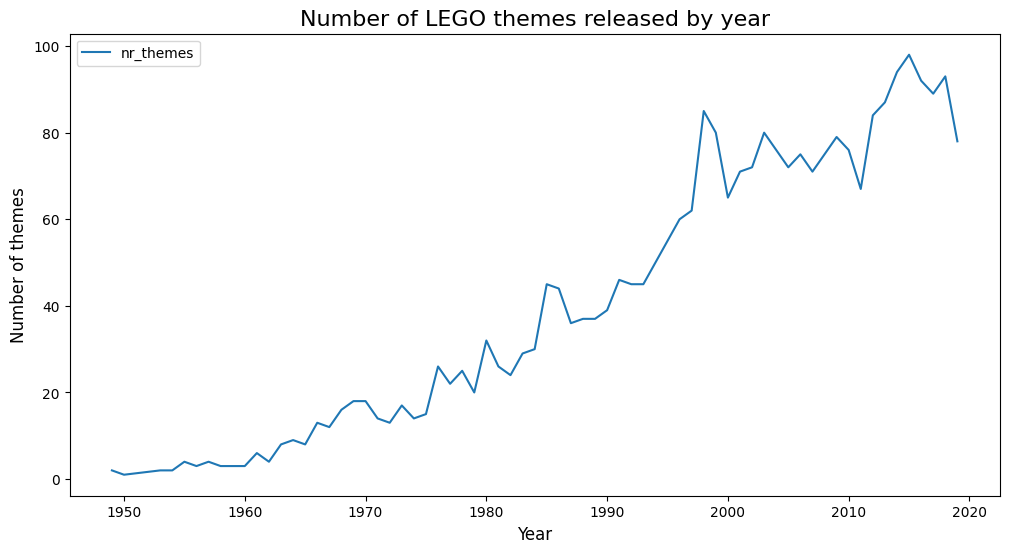

In [ ]:
themes_by_year[0:-2].plot(figsize=(12, 6))
plt.title('Number of LEGO themes released by year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of themes', fontsize=12)

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Number of sets')

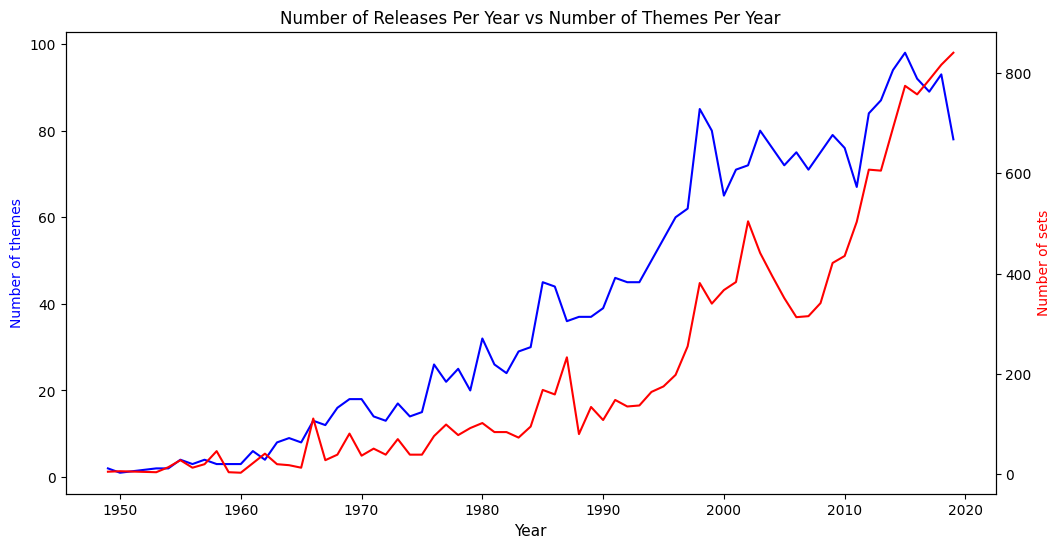

In [ ]:
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(themes_by_year.index[:-2], themes_by_year.values[:-2], color='b')
ax2.plot(year_over_year.index, year_over_year.values, color='r')

plt.title('Number of Releases Per Year vs Number of Themes Per Year')
ax1.set_xlabel('Year', fontsize=11)
ax1.set_ylabel('Number of themes', color='b')
ax2.set_ylabel('Number of sets', color='r')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [ ]:
avg_num_parts = sets_df.groupby('year').agg({'num_parts': 'mean'})
print(avg_num_parts)

       num_parts
year            
1949   99.600000
1950    1.000000
1953   13.500000
1954   12.357143
1955   36.607143
...          ...
2017  221.840967
2018  213.618873
2019  207.510714
2020  259.732938
2021    0.000000

[71 rows x 1 columns]


In [ ]:
print(f"Average number of parts per set in 1954: {avg_num_parts['num_parts'][1954]}")
print(f"Average number of parts per set in 2017: {avg_num_parts['num_parts'][2017]}")

Average number of parts per set in 1954: 12.357142857142858
Average number of parts per set in 2017: 221.8409669211196


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?

Text(0, 0.5, 'Average number of parts')

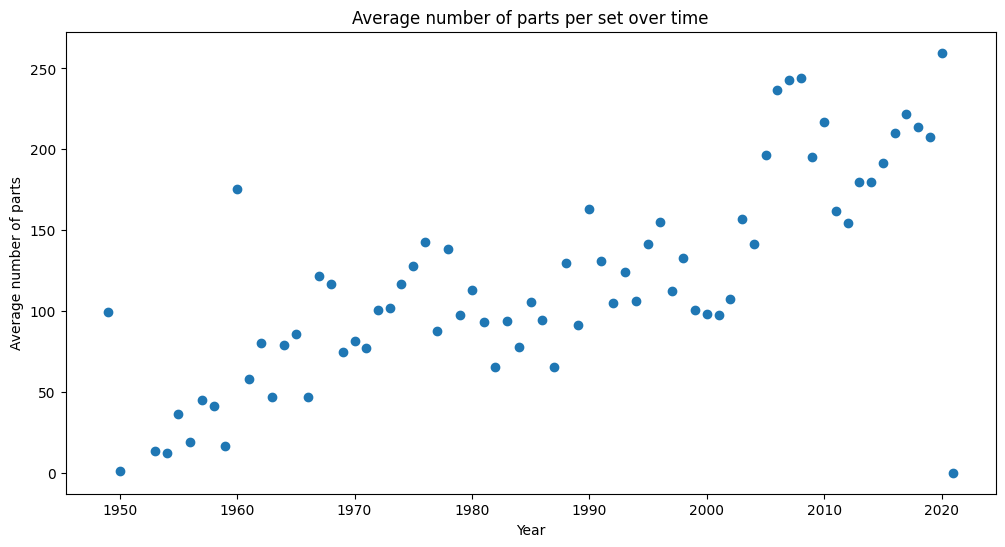

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(x=avg_num_parts.index, y=avg_num_parts['num_parts'])
plt.title('Average number of parts per set over time')
plt.xlabel('Year')
plt.ylabel('Average number of parts')

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="https://www.google.com/url?q=https%3A%2F%2Fi.imgur.com%2FSg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [ ]:
theme_df = pd.read_csv('data/themes.csv')

In [ ]:
theme_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [ ]:
theme_df[theme_df['name'] == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [ ]:
sets_df[sets_df['theme_id'] == 18], sets_df[sets_df['theme_id'] == 158], sets_df[sets_df['theme_id'] == 209], sets_df[sets_df['theme_id'] == 261]

(       set_num                                name  year  theme_id  num_parts
 8786   65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18          1
 12051   8000-1                           Pit Droid  2000        18        223
 12058   8001-1                        Battle Droid  2000        18        336
 12066   8002-1                     Destroyer Droid  2000        18        567
 12071   8007-1                               C-3PO  2001        18        339
 12072   8008-1                        Stormtrooper  2001        18        360
 12073   8009-1                               R2-D2  2002        18        239
 12074   8010-1                         Darth Vader  2002        18        388
 12081   8011-1                          Jango Fett  2002        18        425
 12083   8012-1                  Super Battle Droid  2002        18        378
 15273  K8008-1      Darth Vader / Stormtrooper Kit  2002        18          0,
            set_num                                

### Merging (i.e., Combining) DataFrames based on a Key


In [ ]:
set_theme_count = sets_df['theme_id'].value_counts()
print(set_theme_count[:5])

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64


In [ ]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [ ]:
merged_df = pd.merge(set_theme_count, theme_df, on='id')
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


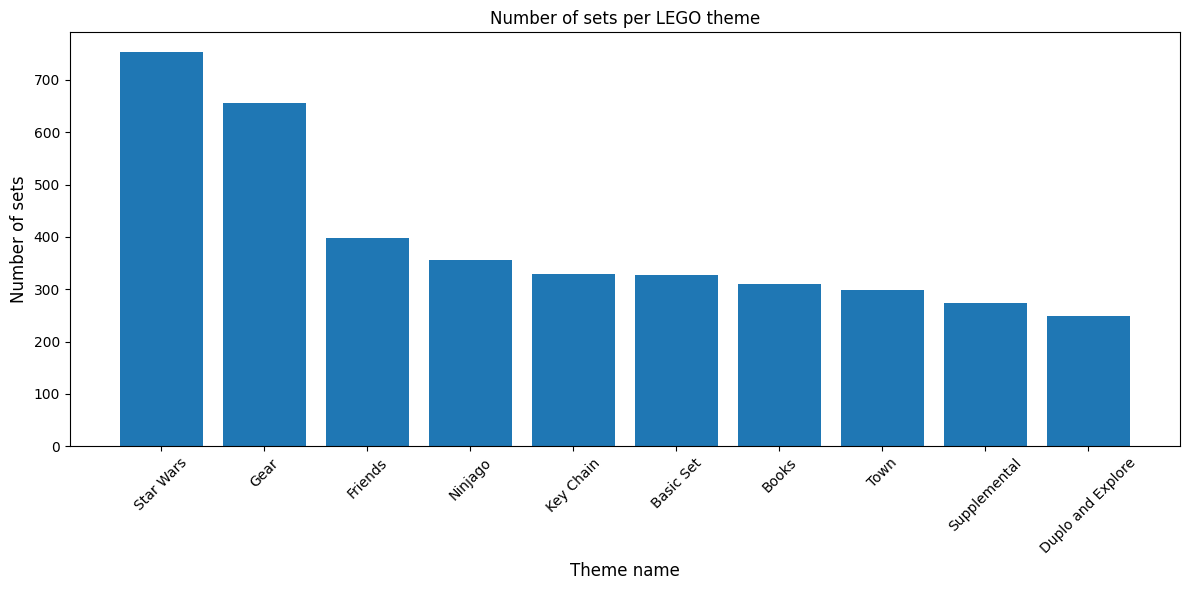

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(merged_df['name'][:10], merged_df['set_count'][:10])
plt.xticks(rotation=45)
plt.title('Number of sets per LEGO theme')
plt.xlabel('Theme name', fontsize=12)
plt.ylabel('Number of sets', fontsize=12)
plt.tight_layout()
plt.show()